In [48]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
# from skimage.color import label2rgb
# from skimage.measure import label

In [49]:
def remove_union(parent, child, union_find):
    if parent in union_find:
        return remove_union(union_find[parent], child, union_find)
    else:
        return parent

def compute_mask(img_bin):
    (h, w) = img_bin.shape
    mask = np.zeros((h, w))
    
    components = 1
    union_find = {}
    
    
    for i in range(h):
        for j in range(w):
            if img_bin[i,j] == 1:
                if i == 0 and j == 0:
                    mask[i,j] = components
                elif i == 0:
                    mask[i,j] = mask[i,j-1]
                elif j == 0:
                    mask[i,j] = mask[i-1,j]
                elif mask[i,j-1] == 0 and mask[i-1,j] != 0:
                    mask[i,j] = mask[i-1,j]
                elif mask[i,j-1] != 0 and mask[i-1,j] == 0:
                    mask[i,j] = mask[i,j-1]
                elif mask[i-1,j] != mask[i,j-1]:
                    mask[i,j] = min(mask[i,j-1],mask[i-1,j])
                    
                    maxi = max(mask[i,j-1],mask[i-1,j])
                    mini = min(mask[i,j-1],mask[i-1,j])
                    union_find[maxi] = mini
                else:
                    components = components + 1
                    mask[i,j] = components
    return mask, union_find

def connected_components(img_bin):
    # 2 pass algorithm
    (h, w) = img_bin.shape
    mask, union_find = compute_mask(img_bin)
    for i in range(h):
        for j in range(w):
            if mask[i,j]:
                mask[i,j] = remove_union(mask[i,j],mask[i,j],union_find)
    return mask

In [50]:
img = cv2.imread('../input/kidney.jpg',0)
img = np.array(img)
img_bin = cv2.threshold(img, 130, 1, cv2.THRESH_BINARY)[1]
img_bin = 
new_img = connected_components(img_bin)


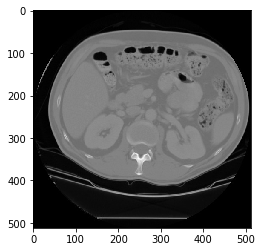

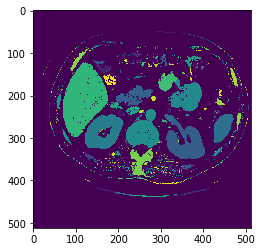

In [51]:
mask = new_img.copy()
mask[np.where(mask==0)]=np.nan    
# mask = label(mask)
# mask = label2rgb(mask,image=img_bin)
# mask = (255*(mask-np.min(mask)))/(np.max(mask)-np.min(mask))
mask = mask.astype('uint8')

plt.imshow(img,cmap='gray');plt.show()
plt.imshow(mask);plt.show()
